### Цели и задачи проекта

Познакомиться с данными датасетов `company_and_rounds.csv`, `acquisition.csv`, `people.csv`, `education.csv`, `degrees.csv`, которые содержат информацию об инфестиционном рынке. Необходимо  подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

### Описание данных
Таблица `acquisition` содержит информацию о покупках одними компаниями других компаний:

- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

Таблица `company_and_rounds` содержит информацию о компаниях и раундах финансирования:

- `company ID` — идентификатор компании.
- `name` — название компании.
- `category code` — категория области деятельности компании.
- `status` — статус компании.
- `founded at` — дата инвестирования.
- `closed at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network username` — ник компании в сети.
- `country code` — код страны компании.
- `investment rounds` — число инвестиционных раундов.
- `funding rounds` — число раундов финансирования.
- `funding total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding round id` — идентификатор этапа финансирования.
- `company id `— идентификатор компании.
- `funded at` — дата финансирования.
- `funding round type` — тип финансирования.
- `raised amount` — сумма финансирования.
- `pre money valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is first round` — является ли раунд первым.
- `is last round` — является раунд последним.

Таблица `education` содержит информацию об образовании сотрудника:

- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор работника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

Таблица `people` содержит информацию о сотрудниках:
- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.

Таблица `degrees` содержит информацию о типе образования сотрудника:

- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность

### Содержимое проекта

Шаг 1. Знакомство с данными: загрузка и первичная предобработка

- 1.1. Вывод общей информации, исправление названия столбцов
- 1.2. Смена типов и анализ пропусков

Шаг 2. Предобработка данных, предварительное исследование

- 2.1. Раунды финансирования по годам
- 2.2. Люди и их образование
- 2.3. Объединять или не объединять — вот в чём вопрос
- 2.4. Проблемный датасет и причина возникновения пропусков

Шаг 3. Исследовательский анализ объединённых таблиц

- 3.1. Объединение данных
- 3.2. Анализ выбросов
- 3.3. Куплены забесплатно?
- 3.4. Цены стартапов по категориям
- 3.5. Сколько раундов продержится стартап перед покупкой

Шаг 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулировать итоговый вывод и рекомендации для заказчика. 


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


Они находятся в папке datasets, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### 1.1. Вывод общей информации, исправление названия столбцов

- Загрузите все данные по проекту.
- Проверьте названия столбцов.
- Выведите информацию, которая необходима вам для принятия решений о предобработке, для каждого из датасетов.

In [4]:
# Эта ячейка исправит проблему SSL если она есть
import ssl
try:
    # Пробуем нормальный режим
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

In [5]:
# устанавливаем библиотеку phik
!pip install phik

zsh:1: command not found: pip


In [6]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
from phik import phik_matrix

# Загружаем данные датасетов

df_acquisition = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
df_company_and_rounds = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
df_people = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
df_education = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
df_degrees = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')

In [7]:
df_acquisition.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [8]:
df_acquisition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


Промежуточный вывод:

- Всего 9407 строк и 6 столбцов. 

Типы данных по столбцам:

- `id` — int64.
- `acquiring_company_id` — int64.
- `acquired_company_id` — int64.
- `term_code` — object. (есть пропуски)
- `price_amount` — int64.
- `acquired_at` — object. (есть пропуски)


- Столбец`acquired_at` лучше будет привести к типу данных 'Дата'. 
- Общий стиль названия столбцов соблюден. 

In [9]:
df_company_and_rounds.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217471 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Промежуточный вывод:
- Всего 217774 строк и 22 столбца. 

Типы данных по столбцам:

- `company ID` — float64.
- `name` — object.
- `category code` — object. (есть пропуски)
- `status` — object.
- `founded at` — object. (есть пропуски)
- `closed at` — object. (есть пропуски)
- `domain` — object. (есть пропуски)
- `network username` — object. (есть пропуски)
- `country code` — object. (есть пропуски)
- `investment rounds` — float64.
- `funding rounds` — float64.
- `funding total` — float64.
- `milestones` — float64.
- `funding round id` — float64. (есть пропуски)
- `company id `— float64. (есть пропуски)
- `funded at` — object. (есть пропуски)
- `funding round type` — object. (есть пропуски)
- `raised amount` — float64. (есть пропуски)
- `pre money valuation` — float64. (есть пропуски)
- `participants` — float64. (есть пропуски)
- `is first round` — float64. (есть пропуски)
- `is last round` — float64. (есть пропуски)


- В таблице встречаектся два столбца с похожим названием `company ID` и `company id`, по описанию данных они должны обозначать одно и то же, но по факту их значения в одних и тех же строках не совпадают. Далее разберемся, почему так получилось и что они значат. 
- Столбец `founded at`, `funded at` лучше будет привести к типу данных 'Дата'.
- Столбцы `funding_round_id`, `company ID`,`company id`, `participants`, `is first round`, `is last round` лучше будет привести к целочисленному типу данных.
- Общий стиль названия столбцов не соблюден, в названиях встречаются пробелы. 

In [11]:
df_people.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [12]:
df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226700 non-null  object 
 2   last_name         226705 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


Промежуточный вывод:

- Всего 226709 строк и 5 столбцов. 

Типы данных по столбцам: 

- `id` — int64.
- `first_name` — object. (есть пропуски)
- `last_name` — object. (есть пропуски)
- `company_id` — float64. (есть пропуски)
- `network_username` — object. (есть пропуски)

- Столбец `company_id` лучше будет привести к целочисленному типу данных.
- Общий стиль названия столбцов соблюден.

In [13]:
df_education.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [14]:
df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


Промежуточный вывод:

- Всего 109610 строк и 4 столбцов. 

Типы данных по столбцам: 

- `id` — int64.
- `person_id` — int64.
- `instituition` — object. (есть пропуски)
- `graduated_at` — onject. (есть пропуски)

- Столбец `graduated_at` лучше будет привести к типу данных 'Дата'.
- Общий стиль названия столбцов соблюден.

In [15]:
df_degrees.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [16]:
df_degrees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98389 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


Промежуточный вывод:

- Всего 109610 строк и 4 столбцов. 

Типы данных по столбцам: 

- `id` — int64.
- `object_id` — object.
- `degree_type` — object. (есть пропуски)
- `subject` — object. (есть пропуски)

- Столбец `object_id` - внешний ключ к столбцу `id` таблицы `people` и к столбцу `person_id` таблицы `education`, но при этом записан он иначе, имеет символы 'p:' в начале. Чтобы в дальнейшем было удобно соединять таблицы, надо удалить эту часть 'p:' в идентификаторах. 
- Общий стиль названия столбцов соблюден.

### 1.2. Смена типов и анализ пропусков

- Преобразуем типы данных к более удобным форматам и изменим стиль названия столбцов, где необходимо. 

In [17]:
df_acquisition['acquired_at'] = pd.to_datetime(df_acquisition['acquired_at'],  format='%Y/%m/%d')
                                               
df_acquisition.info()

ValueError: time data "2007-05-30" doesn't match format "%Y/%m/%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
columns_snake_case = ['company_ID', 'name', 'category_code', 'status' , 'founded_at', 'closed_at',  'domain', 
'network_username', 'country_code', 'investment_rounds', 'funding_rounds', 'funding_total', 'milestones', 
'funding_round_id' ,'company_id','funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation', 
'participants', 'is_first_round', 'is_last_round']

df_company_and_rounds.columns = columns_snake_case 

In [ ]:
df_company_and_rounds['founded_at'] = pd.to_datetime(df_company_and_rounds['founded_at'], format='%Y/%m/%d')
df_company_and_rounds['funded_at'] = pd.to_datetime(df_company_and_rounds['funded_at'], format='%Y/%m/%d')
df_company_and_rounds['closed_at'] = pd.to_datetime(df_company_and_rounds['closed_at'], format='%Y/%m/%d')

for column in ['funding_round_id', 'company_ID', 'company_id', 'participants', 'is_first_round', 'is_last_round']:
    df_company_and_rounds[column] = df_company_and_rounds[column].astype('Int32')   
    
df_company_and_rounds.head()

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,...,milestones,funding_round_id,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,888,1,2005-10-01,series-a,5250000.00,0.00,2,0,1
1,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,889,1,2007-01-01,series-b,9500000.00,0.00,3,0,0
2,1,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.00,...,5.00,2312,1,2008-05-19,series-c+,25000000.00,0.00,4,1,0
3,10,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.00,...,0.00,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>
4,100,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.00,...,4.00,<NA>,<NA>,NaT,NaN,NaN,NaN,<NA>,<NA>,<NA>


In [ ]:
df_company_and_rounds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  Int32         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [ ]:
df_people['company_id'] = df_people['company_id'].astype('Int32')

df_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226709 non-null  int64 
 1   first_name        226704 non-null  object
 2   last_name         226708 non-null  object
 3   company_id        34615 non-null   Int32 
 4   network_username  38867 non-null   object
dtypes: Int32(1), int64(1), object(3)
memory usage: 8.0+ MB


In [ ]:
df_education['graduated_at'] = pd.to_datetime(df_education['graduated_at'], format='%Y/%m/%d')

df_education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


In [ ]:
df_degrees['object_id'] = df_degrees['object_id'].str.replace('p:', '')

df_degrees.head()

,id,object_id,degree_type,subject
0,1,6117,MBA,NaN
1,2,6136,BA,"English, French"
2,3,6136,MS,Mass Communication
3,4,6005,MS,Internet Technology
4,5,5832,BCS,"Computer Science, Psychology"


Промежуточные выводы:
- В таблице `acquisition` в столбце `acquired_at` был преобразован тип данных к `datetime[ns]`. 
- В таблице `company_and_rounds` в названиях столбцов заменили пропуски на нижнему подчеркиванию, тем самым привели все названия во всех таблицах к единому стилю.
- В таблице `company_and_rounds` в столбцах `founded_at` и `funded_at` были преобразованы типы данных к `datetime[ns]`. 
- В таблице `company_and_rounds` в столбцах `funding_round_id`, `company_ID`, `company_id`, `participants`, `is_first_round`, `is_last_round` были преобразованы типы данных к `Int32`. Такой тип данных позволяет сохранить пропуски в столбцах. 
- В таблице `people` в столбце `company_id` был преобразован тип данных к `Int32`. Такой тип данных позволяет сохранить пропуски в столбцах. 
- В таблице `education` в столбце `graduated_at` был преобразован тип данных к `datetime[ns]`. 
- <a id='dgr'></a> В таблице `degrees` в столбце `object_id` был удален элемент "p:" из всех строк, так как `object_id` - внешний ключ к столбцу `id` таблицы `people` и к столбцу `person_id` таблицы `education`, но при этом записан он иначе, имеет символы 'p:' в начале, когда остальные столбцы не имеют. Мы привели все три столбца к единому стилю. 

Далее изучим пропуски в каждой таблице. 

In [ ]:
df_acquisition.isna().sum()

id                         0
acquiring_company_id       0
acquired_company_id        0
term_code               7576
price_amount               0
acquired_at               29
dtype: int64

In [ ]:
(df_acquisition.isna().sum()) / len(df_acquisition)

id                     0.00
acquiring_company_id   0.00
acquired_company_id    0.00
term_code              0.81
price_amount           0.00
acquired_at            0.00
dtype: float64

Промежуточный вывод:

- Пропуски есть в столбцах (число - доля): `term_code`(7576 - 0.81), `acquired_at`(29 - 0.003). В данных столбцах возможны пропуски, возможно пока не сделаны предварительные расчеты и не назначена дата сделки. 

In [ ]:
df_company_and_rounds.isna().sum()

company_ID                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id             164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round         164846
is_last_round          164846
dtype: int64

In [ ]:
(df_company_and_rounds.isna().sum())/ len(df_company_and_rounds)

company_ID            0.00
name                  0.00
category_code         0.34
status                0.00
founded_at            0.50
closed_at             0.98
domain                0.32
network_username      0.56
country_code          0.50
investment_rounds     0.00
funding_rounds        0.00
funding_total         0.00
milestones            0.00
funding_round_id      0.76
company_id            0.76
funded_at             0.76
funding_round_type    0.76
raised_amount         0.76
pre_money_valuation   0.76
participants          0.76
is_first_round        0.76
is_last_round         0.76
dtype: float64

Промежуточныый вывод: 

- Пропуски есть во всех столбцах, далее будут перечислены столбца, у которых доля пропусков составляет >= 0.5: `closed_at` (0.98), `network_username` (0.56), `country_code` (0.5), `funding_round_id` (0.76), `company_id` (0.76), `funded_at` (0.76), `funding_round_type` (0.76), `raised_amount` (0.76), `pre_money_valuation` (0.76), `participants` (0.76), `is_first_round` (0.76), `is_last_round` (0.76). 
- Такое большое количество пропусков может стать проблемой в будущем при ответе на определенные вопросы заказчика. 

In [ ]:
df_people.isna().sum()

id                       0
first_name               5
last_name                1
company_id          192094
network_username    187842
dtype: int64

In [ ]:
(df_people.isna().sum())/ len(df_people)

id                 0.00
first_name         0.00
last_name          0.00
company_id         0.85
network_username   0.83
dtype: float64

Промежуточный вывод:

- Пропуски есть в столбцах (число - доля): `first_name` (5 - 0.000022), `last_name`(1 - 0.000004), `company_id`(0.85), `network_username`(0.83). Странно, что пропуски есть в первых двух столбцах, там их быть не должно, но они составляют совсем незначительную часть от всех данных. В остальных столбцах пропуски - норма. 
- Удалим пропуски из столбцов `first_name` и `last_name`, так как их доля настолько незначительна, что их отсутвие не повлдияет на дальнейший анализ, лишь облегчит нашу работу. 

In [ ]:
df_people = df_people.dropna(subset= ['first_name'])
df_people = df_people.dropna(subset= ['last_name'])

display(df_people.isna().sum())
display(df_people.info())

id                       0
first_name               0
last_name                0
company_id          192090
network_username    187837
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226704 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                226704 non-null  int64 
 1   first_name        226704 non-null  object
 2   last_name         226704 non-null  object
 3   company_id        34614 non-null   Int32 
 4   network_username  38867 non-null   object
dtypes: Int32(1), int64(1), object(3)
memory usage: 9.7+ MB


None

- Соответсвенно, общее число строк уменьшилось на 5 и стало равно 226704.

In [ ]:
df_education.isna().sum()

id                  0
person_id           0
instituition       55
graduated_at    51556
dtype: int64

In [ ]:
(df_education.isna().sum())/ len(df_education)

id             0.00
person_id      0.00
instituition   0.00
graduated_at   0.47
dtype: float64

Промежуточный вывод:

- Пропуски есть в столбцах (число - доля): `instituition` (55 - 0.000502), `graduated_at`(51556 - 0.470359). Пропуски - в рамках нормы,  у некоторых сотрудников может не быть образования. 

In [ ]:
df_degrees.isna().sum()

id                 0
object_id          0
degree_type    11218
subject        28312
dtype: int64

In [ ]:
(df_degrees.isna().sum())/ len(df_degrees)

id            0.00
object_id     0.00
degree_type   0.10
subject       0.26
dtype: float64

Промежуточный вывод:

- Пропуски есть в столбцах (число - доля): `degree_type` (11218 - 0.102345), `subject`(28312 - 0.258298). Вероятно пропускив данных столбцах у тех сотрудников, у которых вообще нет образования, либо это техническая ошибка. 

Общий промежуточный вывод по анализу пропусков:

- Был изучен каждый датасет и его коливество пропусков. Так или иначе в каждом датасете есть пропуски. Это говорит о том, что при их присоединении практически в любом случае для анализа будет доступна только часть информации. 
- Большая часть пропусков содержится в таблице `company_and_rounds`, это может стать проблемой при дальнейшем ответе на вопросы заказчика. 
- Были удалены пропуски из столбцов `first_name` и `last_name` (таблица `people`), так как их доля настолько незначительна, что их отсутвие не повлдияет на дальнейший анализ, лишь облегчит нашу работу. 
- Остальные пропуски удалять или заменять не будем, чтобы не исказить данные. На данном этапе пока не до конца понятно, как работа с пропусками отразится на дальнейшем анализе. При необходимости, мы вернемся к данному шагу и заменим или удалим пропуски позже. 

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам

Необходимо составить сводную таблицу по годам, в которой на основании столбца raised_amount для каждого года указан:
- типичный размер средств, выделяемый в рамках одного раунда;
- общее количество раундов финансирования за этот год.
Оставим в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.
На основе получившейся таблицы построим график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования. В конце отыетим на вопросы заказчика. 


In [ ]:
df_company_and_rounds['year'] = df_company_and_rounds['funded_at'].dt.year

pivot_company_and_rounds = pd.pivot_table(df_company_and_rounds,
                             index="year",
                             values= ['raised_amount', 'funding_rounds'],
                             aggfunc=({'raised_amount': 'median', 'funding_rounds': 'sum'}))


pivot_company_and_rounds_loc = pivot_company_and_rounds.loc[pivot_company_and_rounds['funding_rounds']>50]


display(pivot_company_and_rounds_loc.sort_values(by = 'funding_rounds', ascending = False))


,funding_rounds,raised_amount
year,,
2012.00,24549.00,1000000.00
2013.00,23978.00,1200000.00
2011.00,23503.00,1200000.00
2010.00,16913.00,1602500.00
2009.00,11857.00,2000000.00
2008.00,9931.00,3110000.00
2007.00,8494.00,3973320.00
2006.00,6295.00,5000000.00
2005.00,4157.00,5500000.00


- Больше всего раундов было в 2012 году (24549.0). Меньше всего -  в 1998 (72.0). 

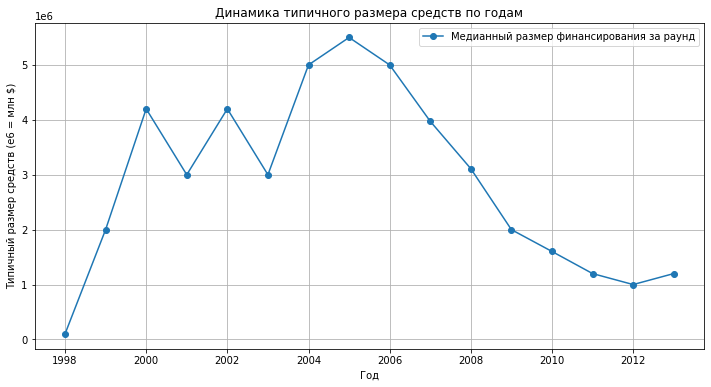

In [ ]:
pivot_to_plot = pivot_company_and_rounds_loc

plt.figure(figsize=(12,6))
plt.plot(
    pivot_to_plot.index, 
    pivot_to_plot['raised_amount'], 
    marker='o', 
    linestyle='-',
    label='Медианный размер финансирования за раунд'
)
plt.title('Динамика типичного размера средств по годам')
plt.xlabel('Год')
plt.ylabel('Типичный размер средств (е6 = млн $)')
plt.grid(True)
plt.legend()
plt.show()


В каком году типичный размер собранных в рамках одного раунда средств был максимален?

- В 2005 году типичный замер собранных средств в рамках одного раунда был максимален (5500000.0). 

Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

- Анализируя график, можно выделить его пик в 2005 году,после которого график пошел на спад, но с 2012 по 2013 год он начал рости и точка графика 2013 года выше точки графика 2012 года. По сравнению с 2012 годом в 2013 количество раундов уменьшилось,  а количество выделяемых средств увеличилиось. 


### 2.2. Люди и их образование

Заказчик хочет понять, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

- Оценим насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп. 
- Оценим, возможно ли для выполнения задания присоединить к этим таблицам ещё и таблицу `degrees.csv`.

In [ ]:
df_people=df_people.rename(columns={'id': 'person_id'}) # Переназовем id чтобы можно было присоединить таблитцы

df_people_education = df_people.merge(df_education, on = 'person_id', how = 'left')

display(df_people_education.head(20))

,person_id,first_name,last_name,company_id,network_username,id,instituition,graduated_at
0,10,Mark,Zuckerberg,5,NaN,2415.00,Harvard University,NaT
1,100,Peter,Lester,27,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,<NA>,NaN,NaN,NaN,NaT
5,100002,Keith,Kurzendoerfer,<NA>,NaN,NaN,NaN,NaT
6,100006,Courtney,Homer,81558,jobsbostontech,83604.00,MIT Sloan School of Management,2004-01-01
7,100009,Eddy,Badrina,<NA>,NaN,NaN,NaN,NaT
8,100010,Michael,Dadashyan,<NA>,fbroulette,NaN,NaN,NaT
9,100011,Jeff,Grell,<NA>,NaN,NaN,NaN,NaT


<a id='str'></a>Принято делить предприятия по количетсву сотрудников следующим образом:
1. Микропредприятие = до 15 чел. 
2. Мелкие предприятие = 16-100 чел. 
3. Средние предприятие = 101 - 250 чел. 
4. Крпуные предприятия = 251 - ... чел. 

Разделим предприятия из нашего датасета также. За начало деления возьмем -1, чтобы предприятия с 0 сотрудников тоже вошли в деление по категориям. За конечнае значение в делении возьмем просто очень большое число, превышающее в целом адекватное число сотрудников любой компании, чтобы в категорию "Крупные предприятия" попали точно все предприятия с >251 сотрудников.

In [ ]:
grouped_people_education = df_people_education.groupby('company_id')['person_id'].count()
grouped_people_education = grouped_people_education.rename('count').reset_index()
grouped_people_education['group'] = pd.cut(grouped_people_education['count'], bins = [-1, 15, 100, 250, 1000000000000000000000000], labels = ['Микропредприятие', 'Малые предприятие', 'Средние предприятия', 'Крупные предприятия'], right=False)


display(grouped_people_education.head(20))


# Проверяем таблицы на пропуски перед присоединением

display(grouped_people_education['company_id'].isna().sum())
display(df_people_education['company_id'].isna().sum())
display(df_people_education['company_id'].unique())


display(grouped_people_education.info())

# Изменить тип данных столбца 'company_id' в grouped_people_education
grouped_people_education['company_id'] = pd.to_numeric(grouped_people_education['company_id'], downcast = 'integer')

display(grouped_people_education.info())

#Чтобы пропуски не мешали рассчетам средний доли сотрудников без информации об образовании,удалим их 
df_people_education = df_people_education.dropna(subset=['company_id'])
grouped_people_education = grouped_people_education.dropna(subset=['company_id'])
                                                    
df_people_education = df_people_education.merge(
    grouped_people_education[['company_id', 'group']], 
    how='left', 
    on='company_id'
)


display(df_people_education.head(20))

display(df_people_education['group'].unique())


,company_id,count,group
0,1,3,Микропредприятие
1,2,1,Микропредприятие
2,3,5,Микропредприятие
3,4,18,Малые предприятие
4,5,84,Малые предприятие
5,8,3,Микропредприятие
6,9,1,Микропредприятие
7,10,3,Микропредприятие
8,11,5,Микропредприятие
9,12,64,Малые предприятие


0

222901

<IntegerArray>
[     5,     27,    292,   2526,   <NA>,  81558, 148554,  81571,  81576,
     63,
 ...
  81525,  81527,  86377,  48256,  64683,  81971, 146815,  83651, 188200,
 143419]
Length: 22923, dtype: Int32

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22922 entries, 0 to 22921
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   company_id  22922 non-null  int64   
 1   count       22922 non-null  int64   
 2   group       22922 non-null  category
dtypes: category(1), int64(2)
memory usage: 380.9 KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22922 entries, 0 to 22921
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   company_id  22922 non-null  int32   
 1   count       22922 non-null  int64   
 2   group       22922 non-null  category
dtypes: category(1), int32(1), int64(1)
memory usage: 291.3 KB


None

,person_id,first_name,last_name,company_id,network_username,id,instituition,graduated_at,group
0,10,Mark,Zuckerberg,5,NaN,2415.00,Harvard University,NaT,Малые предприятие
1,100,Peter,Lester,27,NaN,NaN,NaN,NaT,Микропредприятие
2,1000,Dr. Steven,E. Saunders,292,NaN,NaN,NaN,NaT,Микропредприятие
3,10000,Neil,Capel,2526,NaN,NaN,NaN,NaT,Микропредприятие
4,100006,Courtney,Homer,81558,jobsbostontech,83604.00,MIT Sloan School of Management,2004-01-01,Микропредприятие
5,100018,Adam,Beckerman,148554,adam_beckerman,14433.00,"Columbia University, Business School",2004-01-01,Микропредприятие
6,100018,Adam,Beckerman,148554,adam_beckerman,14434.00,"University of Maryland, College Park",1996-01-01,Микропредприятие
7,100023,Neil,Chandran,81571,neilchandran,NaN,NaN,NaT,Микропредприятие
8,100031,Sandeep,Hegde,81576,sandeephegde,14436.00,Gogte Institute of Technology,2010-01-01,Микропредприятие
9,100049,Mike,Cannady,63,NaN,32494.00,New York University (NYU),NaT,Малые предприятие


['Малые предприятие', 'Микропредприятие', 'Средние предприятия', 'Крупные предприятия']
Categories (4, object): ['Микропредприятие' < 'Малые предприятие' < 'Средние предприятия' < 'Крупные предприятия']

In [ ]:
df_people_education['group'].unique()

['Малые предприятие', 'Микропредприятие', 'Средние предприятия', 'Крупные предприятия']
Categories (4, object): ['Микропредприятие' < 'Малые предприятие' < 'Средние предприятия' < 'Крупные предприятия']

In [ ]:
# Группируем первую табличку с общим числом  сотрудников
grouped_ppl_ed_2 = df_people_education.groupby('group')['person_id'].nunique().reset_index()

#Группируем вторую табличку с числом сотрудников без образования
grouped_ppl_ed_3 = df_people_education.loc[df_people_education['instituition'].isna() == True].groupby('group')['person_id'].nunique().reset_index()

# Объединяем эти таблички
grouped_ppl_ed_23 = grouped_ppl_ed_2.merge(grouped_ppl_ed_3, on = 'group')

display(grouped_ppl_ed_23)

# Переименуем названия столбцов, чтобы было более понятно смотреть результат
grouped_ppl_ed_23 = grouped_ppl_ed_23.rename(columns={'person_id_y': 'without_education', 'person_id_x' : 'employee_total'})


#Считаем долю в новом столбце объединенной таблички
grouped_ppl_ed_23['part'] = round(grouped_ppl_ed_23['without_education']/grouped_ppl_ed_23['employee_total'], 2)

display(grouped_ppl_ed_23.sort_values(by='part', ascending=False))

,group,person_id_x,person_id_y
0,Микропредприятие,32061,15364
1,Малые предприятие,1949,645
2,Средние предприятия,359,90
3,Крупные предприятия,244,76


,group,employee_total,without_education,part
0,Микропредприятие,32061,15364,0.48
1,Малые предприятие,1949,645,0.33
3,Крупные предприятия,244,76,0.31
2,Средние предприятия,359,90,0.25


Построим столбчатую диаграмму по полученным данным.

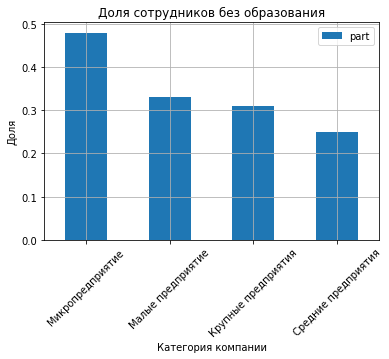

In [ ]:

grouped_ppl_ed_23.sort_values(by='part', ascending=False).plot(kind = 'bar', x = 'group', y = 'part', rot = 45)

plt.title('Доля сотрудников без образования')
plt.xlabel('Категория компании')
plt.ylabel('Доля')
plt.grid(True)
plt.show()

Промежуточные выводы:

- После объединения таблиц `people` и `education`, мы сгруппировали данные по `company_id` и посчитали кол-во сотрудников. Далее мы разделили компании на категории [по кол-ву сотрудников](#str).
- Мы посчитали долю сотрудников без образования в каждой категории. Вот каие результаты мы получили:
1. Микропредприятие	0.48
2. Малые предприятие 0.33
3. Крупные предприятия 0.31
4.	Средние предприятия	0.25

Наибольшая доля сотрудников без образования в категории "Микропредприятия" (до 15 сотрудников). Можно предположить, что такие предприятия только начали развиваться и набирают в штат стажеров-студентов, которые пока находятся в процессе получения образования. Или, например, в таких компаниях ценят больше опыт работы, чем факт наличия образования. Самая низкая доля работников без образования в категории "Средние предприятия". Это может быть связано с тем, что такие предприятия хотят масштабно развиваться и расти и переходить в разряд Крпуных предприятий и им требуются обученные управленцы и специалисты, поэтому такие компании больше смотрят в сторону работников с образованием. 

Присоединить таблицу `degrees.csv` возможно, так как еще в перовм пункте мы привели [индексы к единому виду](#dgr). Попробуем это проверить:

In [ ]:
df_people_education = df_people_education.merge(df_degrees, on = 'id', how = 'left')
display(df_people_education.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44788 entries, 0 to 44787
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   person_id         44788 non-null  int64         
 1   first_name        44788 non-null  object        
 2   last_name         44788 non-null  object        
 3   company_id        44788 non-null  Int32         
 4   network_username  22892 non-null  object        
 5   id                28638 non-null  float64       
 6   instituition      28609 non-null  object        
 7   graduated_at      20954 non-null  datetime64[ns]
 8   group             44788 non-null  category      
 9   object_id         28638 non-null  object        
 10  degree_type       25563 non-null  object        
 11  subject           23263 non-null  object        
dtypes: Int32(1), category(1), datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 4.0+ MB


None

Получили таблицу, в которой 44788 строк и 15 столбцов. 

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах. Нам необходимо понимать, дублируется ли для разных датасетов информация в столбцах с таким названием, и если да — тио насколько часто.
- Оценим, можно ли использовать столбцы с именем `network_username` для объединения данных.

В таблицах `people` и `company_and_rounds` содержатся столбцы `network_username`. Проверим общее количество строк в таблице, количество пустых строк и уникальных строк по столбцу `network_username`.

In [ ]:
display(df_people.info()) # Кол-во строк

display(df_people['network_username'].isna().sum()) # Кол-во пустых строк

display(round(df_people['network_username'].isna().sum()/ len(df_people['network_username']), 2)) # Доля пропусков в столбце по отношению к общему числу строк в столбце

display(df_people['network_username'].nunique()) #Кол-во уникальных строк

<class 'pandas.core.frame.DataFrame'>
Int64Index: 226704 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   person_id         226704 non-null  int64 
 1   first_name        226704 non-null  object
 2   last_name         226704 non-null  object
 3   company_id        34614 non-null   Int32 
 4   network_username  38867 non-null   object
dtypes: Int32(1), int64(1), object(3)
memory usage: 9.7+ MB


None

187837

0.83

38421

In [ ]:
display(df_company_and_rounds.info()) # Кол-во строк

display(df_company_and_rounds['network_username'].isna().sum()) # Кол-во пустых строк

display(round(df_company_and_rounds['network_username'].isna().sum()/ len(df_company_and_rounds['network_username']), 2)) # Доля пропусков в столбце по отношению к общему числу строк в столбце

display(df_company_and_rounds['network_username'].nunique()) # Кол-во уникальных строк

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  Int32         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

None

122240

0.56

79571

Промежуточные выводы:

Для таблицы `people` в столбце `network_username`:

- Всего 38867 строки из 226704 строк (есть пропуски). 
- Пустых строк - 187837. 
- Уникальных строк - 38421 (есть дубли). 
- Доля пропусков - 0.83.

Для таблицы `company_and_rounds` в столбце `network_username`:

- Всего 95534 строки из 217472 строк (есть пропуски). 
- Пустых строк - 122240. 
- Уникальных строк - 79571 (есть дубли).
- Доля попусков - 0.56. 


В таблице `people` значительно меньше значений в столбце `network_username`, чем в `company_and_rounds`. Дубли в целом могут быть по саими никнеймам, пропуски могут помешать при ананлизе. 

Посмотрим сами уникальные значения никнеймов сотрудников. 

In [ ]:
display(df_company_and_rounds['network_username'].unique())

display(df_people['network_username'].unique())

array(['BachelrWetpaint', nan, 'Hostnine', ..., 'networkzend',
       'pPhotonet', 'Photonet'], dtype=object)

array([nan, 'jobsbostontech', 'fbroulette', ..., 'itechsocialnet',
       'socialnethubs', 'esocialnetlike'], dtype=object)

В целом, объединить две таблицы `company_and_rounds по столбцу` и `people` по столбцу `network_username`: столбцы имеют один тип данных (`object`). Но так или иначе в итоговой объединенной таблице будут пропуски, так как в одной таблице строк в целом больше и, соответвеннно, больше `network_username`. Также велика вероятность, что возможно некоторые `network_username` не будут находить совпадений в другой таблице, но тем не менее само объединение возможно. 


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Любым удобным способом приведем данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний. Обратим внимание на структуру датасета, порядок и названия столбцов, проанализируйте значения.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

In [ ]:
display(df_company_and_rounds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_ID           217472 non-null  Int32         
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

None

Можно предположить, что это когда то были две разные таблицы с двумя `company_id`, потому что ровно до слуедующего столбца `company_id` можно заметить информацию о компаниях и далее о раундах финансирования. Можно разделить данные таблицы на две, чтобы в дальнейшем было удобнее проводить анализ.


In [ ]:
# При помощи loc создадим новую таблицу df_company со столбцами от начала до milestones

df_company = df_company_and_rounds.loc[:,:'milestones']

# Создадим вторую таблицу df_rounds со столбцами от company_id до year
df_rounds = df_company_and_rounds[['company_id', 'funding_round_id', 'funded_at', 'funding_round_type', 'raised_amount', 'pre_money_valuation', 'participants', 'is_first_round', 'is_last_round', 'year']]     

display(df_company.info())
display(df_rounds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   company_ID         217472 non-null  Int32         
 1   name               217472 non-null  object        
 2   category_code      143886 non-null  object        
 3   status             217472 non-null  object        
 4   founded_at         109956 non-null  datetime64[ns]
 5   closed_at          3449 non-null    datetime64[ns]
 6   domain             147159 non-null  object        
 7   network_username   95534 non-null   object        
 8   country_code       108607 non-null  object        
 9   investment_rounds  217472 non-null  float64       
 10  funding_rounds     217472 non-null  float64       
 11  funding_total      217472 non-null  float64       
 12  milestones         217472 non-null  float64       
dtypes: Int32(1), datetime64[ns](2), float64(4), 

None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   company_id           52928 non-null  Int32         
 1   funding_round_id     52928 non-null  Int32         
 2   funded_at            52680 non-null  datetime64[ns]
 3   funding_round_type   52928 non-null  object        
 4   raised_amount        52928 non-null  float64       
 5   pre_money_valuation  52928 non-null  float64       
 6   participants         52928 non-null  Int32         
 7   is_first_round       52928 non-null  Int32         
 8   is_last_round        52928 non-null  Int32         
 9   year                 52680 non-null  float64       
dtypes: Int32(5), datetime64[ns](1), float64(3), object(1)
memory usage: 13.5+ MB


None

Мы получили две новых таблицы `df_company` и `df_rounds`. В первой таблице 217774 строк и 13 столбцов. Во второй таблице 217774 строк и 10 столбцов. 

In [ ]:
# Изучим неявные дубликаты по столбам в таблице company
for column in ['name','category_code','status', 'domain', 'network_username', 'country_code']:
    display(column, df_company[column].unique())

# Изучим неявные дубликаты по столбцу в таблице rounds
display(df_rounds['funding_round_type'].unique())


# Изучим явные дубликаты
display('Кол-во явных дубликатов по столбцу company_ID таблицы company:', sum(df_company.duplicated(subset=['company_ID'], keep = 'first')))
display('Кол-во явных дубликатов по столбцу company_id таблицы rounds:',sum(df_rounds.duplicated(subset=['company_id'], keep = 'first')))

# Проведем нормализацию данных и изучим дубликаты поосле этого 
df_company['name'] = df_company['name'].str.lower()
df_company['status'] = df_company['status'].str.lower()
df_company['category_code'] = df_company['category_code'].str.lower()
df_company['country_code'] = df_company['country_code'].str.lower()

# Изучаем явные дубликаты после нормализации
display('Кол-во явных дубликатов по столбцам таблицы company:', sum(df_company.duplicated(keep = 'first')))
display('Кол-во явных дубликатов по столбцам таблицы rounds:', sum(df_rounds.duplicated(subset = ['company_id', 'funding_round_id'])))

# Изучим дубликаты в таблице по столбцу name
display(df_company[df_company.duplicated(subset = ['name'], keep = 'first')].sort_values(by = 'name'))

#Удалим явные дубликаты
df_company = df_company.drop_duplicates(keep = 'first')
df_company = df_company.drop_duplicates(subset = ['name'])
df_rounds = df_rounds.drop_duplicates(subset = ['company_id', 'funding_round_id'])


#Удалим пропуски по общему столбцу для обоих таблиц
df_company = df_company.dropna(subset=['company_ID'])
df_company = df_company.dropna(subset=['name'])
df_rounds = df_rounds.dropna(subset = ['company_id'])
df_rounds = df_rounds.dropna(subset = ['funding_round_id']) # Удаляем пропуски по этому столбцу, чтобы оставить полную инф-ю для дальнейшего анализа

display(df_company)
display(df_rounds)



'name'

array(['Wetpaint', 'Flektor', 'There', ..., 'Pphotonet', 'Photonet', nan],
      dtype=object)

'category_code'

array(['web', 'games_video', 'network_hosting', 'advertising',
       'cleantech', nan, 'enterprise', 'other', 'consulting', 'mobile',
       'health', 'software', 'analytics', 'finance', 'education',
       'medical', 'manufacturing', 'biotech', 'ecommerce',
       'public_relations', 'hardware', 'search', 'news', 'government',
       'security', 'photo_video', 'travel', 'semiconductor', 'social',
       'legal', 'transportation', 'hospitality', 'sports', 'nonprofit',
       'fashion', 'messaging', 'music', 'automotive', 'design',
       'real_estate', 'local', 'nanotech', 'pets'], dtype=object)

'status'

array(['operating', 'acquired', 'closed', 'ipo', nan], dtype=object)

'domain'

array(['wetpaint-inc.com', 'flektor.com', 'there.com', ...,
       'flowgram.com', 'pPhotonet.co', 'Photonet.com'], dtype=object)

'network_username'

array(['BachelrWetpaint', nan, 'Hostnine', ..., 'networkzend',
       'pPhotonet', 'Photonet'], dtype=object)

'country_code'

array(['USA', nan, 'MAR', 'IND', 'AUS', 'FRA', 'JPN', 'NLD', 'EGY', 'ISR',
       'GBR', 'THA', 'CAN', 'AUT', 'IRL', 'SWE', 'DEU', 'BRA', 'FIN',
       'RUS', 'SGP', 'MEX', 'CHN', 'ESP', 'ISL', 'KOR', 'TUR', 'DNK',
       'ARG', 'PAK', 'HUN', 'POL', 'GRC', 'PRT', 'BLR', 'CSS', 'MKD',
       'CHE', 'SVN', 'UKR', 'ITA', 'NZL', 'LIE', 'NOR', 'CZE', 'VNM',
       'HRV', 'BEN', 'CHL', 'GHA', 'ZAF', 'MYS', 'EST', 'BEL', 'SVK',
       'TWN', 'CRI', 'HKG', 'BGD', 'BOL', 'LBN', 'LUX', 'AZE', 'COL',
       'PHL', 'ARE', 'IDN', 'ROM', 'ANT', 'CYM', 'NGA', 'GIN', 'CYP',
       'LKA', 'SWZ', 'VGB', 'MLT', 'SAU', 'KEN', 'BGR', 'PER', 'LVA',
       'LAO', 'NPL', 'MDA', 'CMR', 'UGA', 'TUN', 'URY', 'MUS', 'VEN',
       'OMN', 'ECU', 'KWT', 'JOR', 'LTU', 'ALB', 'QAT', 'UMI', 'PST',
       'REU', 'GTM', 'PCN', 'BHS', 'GEO', 'BWA', 'DZA', 'GRD', 'ZMB',
       'GIB', 'PAN', 'MTQ', 'PRI', 'BIH', 'DMA', 'BHR', 'SYC', 'SLE',
       'TTO', 'VCT', 'ARA', 'BRB', 'NAM', 'SLV', 'AFG', 'BLZ', 'UZB',
       'IRN', '

array(['series-a', 'series-b', 'series-c+', nan, 'angel', 'venture',
       'other', 'private-equity', 'post-ipo', 'crowdfunding'],
      dtype=object)

'Кол-во явных дубликатов по столбцу company_ID таблицы company:'

21220

'Кол-во явных дубликатов по столбцу company_id таблицы rounds:'

185834

'Кол-во явных дубликатов по столбцам таблицы company:'

21220

'Кол-во явных дубликатов по столбцам таблицы rounds:'

164845

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
171448,44927,10-20 media,ecommerce,operating,2001-01-01,NaT,10-20media.com,NaN,usa,0.00,3.00,1550000.00,0.00
171447,44927,10-20 media,ecommerce,operating,2001-01-01,NaT,10-20media.com,NaN,usa,0.00,3.00,1550000.00,0.00
179056,51379,1000memories,web,acquired,2010-07-01,NaT,1000memories.com,1000memories,usa,0.00,2.00,2535000.00,2.00
55163,191780,1000museums.com,web,operating,2008-01-01,NaT,1000museums.com,1000Museums,usa,0.00,2.00,1289880.00,1.00
163437,38391,100du.tv,hospitality,operating,NaT,NaT,100du.com,NaN,NaN,0.00,2.00,3000000.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217769,<NA>,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217770,<NA>,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217771,<NA>,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
217772,<NA>,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,usa,0.00,3.00,39750000.00,5.00
3,10,flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,usa,0.00,0.00,0.00,0.00
4,100,there,games_video,acquired,NaT,NaT,there.com,NaN,usa,0.00,0.00,0.00,4.00
5,10000,mywebbo,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.00,0.00,0.00,0.00
6,10001,the movie streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217462,183352,mattress source,NaN,operating,NaT,NaT,mattresssourcestl.com,network,NaN,0.00,0.00,0.00,0.00
217463,3429,zend technologies,software,operating,1999-01-01,NaT,zend.com,networkzend,usa,0.00,4.00,44000000.00,6.00
217467,7748,flowgram,web,closed,2007-06-01,2008-06-11,flowgram.com,network,usa,0.00,1.00,1300000.00,3.00
217468,174536,pphotonet,games_video,operating,2012-05-01,NaT,pPhotonet.co,pPhotonet,NaN,0.00,0.00,0.00,0.00


,company_id,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round,year
0,1,888,2005-10-01,series-a,5250000.00,0.00,2,0,1,2005.00
1,1,889,2007-01-01,series-b,9500000.00,0.00,3,0,0,2007.00
2,1,2312,2008-05-19,series-c+,25000000.00,0.00,4,1,0,2008.00
15,1001,1644,2008-02-26,series-a,5000000.00,0.00,3,1,1,2008.00
20,10014,6682,2008-09-01,angel,0.00,0.00,1,1,1,2008.00
...,...,...,...,...,...,...,...,...,...,...
217769,282847,56454,2011-01-31,other,5500000.00,0.00,0,1,1,2011.00
217770,55477,56542,2011-01-13,venture,10633300.00,0.00,0,0,1,2011.00
217771,55477,56543,2012-05-31,venture,2125720.00,0.00,0,1,0,2012.00
217772,283492,56928,2013-12-03,venture,3602480.00,0.00,5,1,1,2013.00


Провели преобразование таблиц, избавились от дубликатов и пропусков, тем самам упростили дальнейший анализ. Можно предположить, что для таблиицы `rounds` `company_id` - внешний ключ, так как он повторяется. 

Промежуточные выводы по шагу 2:

2.1

- Больше всего раундов было в 2012 году (24549.0). Меньше всего -  в 1998 (72.0). 

В каком году типичный размер собранных в рамках одного раунда средств был максимален?

- В 2005 году типичный замер собранных средств в рамках одного раунда был максимален (5500000.0). 

Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

- Анализируя график, можно выделить его пик в 2005 году,после которого график пошел на спад, но с 2012 по 2013 год он начал рости и точка графика 2013 года выше точки графика 2012 года. По сравнению с 2012 годом в 2013 количество раундов уменьшилось,  а количество выделяемых средств увеличилиось. 



2.2
- Мы посчитали долю сотрудников без образования в каждой категории. Вот каие результаты мы получили:
1. Микропредприятие	0.48
2. Малые предприятие 0.33
3. Крупные предприятия 0.31
4.	Средние предприятия	0.25

Наибольшая доля сотрудников без образования в категории "Микропредприятия" (до 15 сотрудников). Можно предположить, что такие предприятия только начали развиваться и набирают в штат стажеров-студентов, которые пока находятся в процессе получения образования. Или, например, в таких компаниях ценят больше опыт работы, чем факт наличия образования. Самая низкая доля работников без образования в категории "Средние предприятия". Это может быть связано с тем, что такие предприятия хотят масштабно развиваться и расти и переходить в разряд Крпуных предприятий и им требуются обученные управленцы и специалисты, поэтому такие компании больше смотрят в сторону работников с образованием. 

- Присоединить таблицу `degrees.csv` возможно, так как еще в перовм пункте мы привели [индексы к единому виду](#dgr). 

2.3

- В целом, объединить две таблицы `company_and_rounds по столбцу` и `people` по столбцу `network_username`: столбцы имеют один тип данных. Но так или иначе в итоговой объединенной таблице будут пропуски, так как в одной таблице строк в целом больше и, соответвеннно, больше `network_username`. Также велика вероятность, что возможно некоторые `network_username` не будут находить совпадений в другой таблице, но тем не менее само объединение возможно. 

2.4

- Провели преобразование таблиц, избавились от дубликатов и пропусков, тем самам упростили дальнейший анализ.Мы получили две новых таблицы df_company и df_rounds. В первой таблице 217774 строк и 13 столбцов. Во второй таблице 217774 строк и 10 столбцов. Можно предположить, что для таблиицы `rounds` `company_id` - внешний ключ, так как он повторяется. 



## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмеем данные из обработанного датасета `company_and_rounds.csv` — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`. В результирующей таблице должно получиться порядка 40 тысяч компаний.

Проверим полноту и корректность получившейся таблицы. Далее работайте только с этими данными.

In [ ]:
# Создадим новую таблицу df_company_and_rounds_new с отфильтрованными по условию данными
df_company_new = df_company.loc[(df_company['funding_rounds']>0) | (df_company_and_rounds['investment_rounds']>0) | (df_company_and_rounds['status'] =='acquired') ]

# Выведем столбцы, по которым фильтровали данные
display(df_company_new[['funding_rounds', 'investment_rounds', 'status' ]])

# Выведем новую таблицу и информацию о ней
display(df_company_new.head())
display(df_company_new.info())

# Посчитаем кол-во строк
display(df_company_new.shape[0])

,funding_rounds,investment_rounds,status
0,3.00,0.00,operating
3,0.00,0.00,acquired
4,0.00,0.00,acquired
15,1.00,0.00,acquired
20,1.00,0.00,acquired
...,...,...,...
217458,1.00,0.00,operating
217459,1.00,0.00,operating
217463,4.00,0.00,operating
217467,1.00,0.00,closed


,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,usa,0.00,3.00,39750000.00,5.00
3,10,flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,usa,0.00,0.00,0.00,0.00
4,100,there,games_video,acquired,NaT,NaT,there.com,NaN,usa,0.00,0.00,0.00,4.00
15,1001,friendfeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,usa,0.00,1.00,5000000.00,3.00
20,10014,mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,usa,0.00,1.00,0.00,4.00


<class 'pandas.core.frame.DataFrame'>
Int64Index: 40745 entries, 0 to 217469
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_ID         40745 non-null  Int32         
 1   name               40745 non-null  object        
 2   category_code      35314 non-null  object        
 3   status             40745 non-null  object        
 4   founded_at         27806 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35753 non-null  object        
 7   network_username   20849 non-null  object        
 8   country_code       34741 non-null  object        
 9   investment_rounds  40745 non-null  float64       
 10  funding_rounds     40745 non-null  float64       
 11  funding_total      40745 non-null  float64       
 12  milestones         40745 non-null  float64       
dtypes: Int32(1), datetime64[ns](2), float64(4), object(6)
memory

None

40745

Да, получилось примерно 40 тыс. строк в отфильтрованной таблице.


### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.
- В процессе расчёта значений обратим внимание, например, на показатели, возвращаемые методом `.describe()`, — объясним их. Применимы ли к таким данным обычные способы нахождения типичных значений?

In [ ]:
# Установим опцию отображения чисел в обычном формате, а не экспоненциальном
pd.set_option('display.float_format', '{:.2f}'.format)

display(df_company_and_rounds_new['funding_total'].describe())

count        40747.00
mean      10135609.64
std       56464359.98
min              0.00
25%              0.00
50%         600000.00
75%        5650650.00
max     5700000000.00
Name: funding_total, dtype: float64

Можно заметить, что медиана очень сильно отклоняется от среднего арифметического, что свидетельствует о выбросах. Также можно заметить, что минимальное значение `funding_total` = 0, уберем их из анализа, так как это аномалия. Также можно щаметить очень высокое значение стнадартного отклонения, что свидетельствует о сильном отклонения значений от среднего. Построим график распределения по данному столбцу.

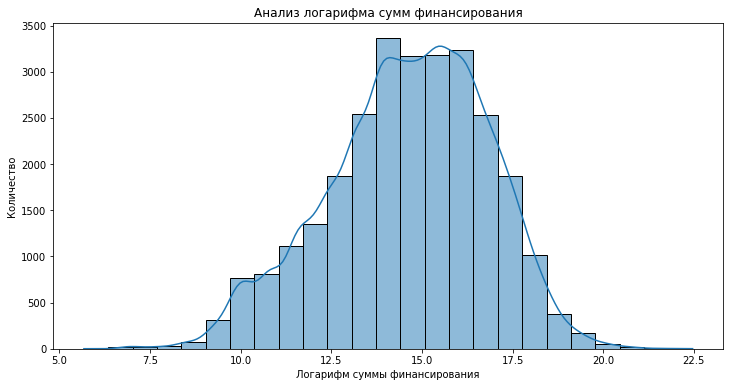

2564500.0

In [ ]:
# Фильтрация по наличию финансирования
df_company_and_rounds_new_flt = df_company_and_rounds_new.loc[df_company_and_rounds_new['funding_total'] > 0].copy()

# Вычисление логарифма сумм финансирования
df_company_and_rounds_new_flt['funding_total_log'] = np.log(df_company_and_rounds_new_flt['funding_total'])

# Построение гистограммы
plt.figure(figsize=(12, 6))
sns.histplot(data=df_company_and_rounds_new_flt, x='funding_total_log', bins=25, kde=True)

plt.title('Анализ логарифма сумм финансирования')
plt.ylabel('Количество')
plt.xlabel('Логарифм суммы финансирования')
plt.show()

# Посчитаем типичный размер общего финансирования компании
display(df_company_and_rounds_new_flt['funding_total'].median())

Промежуточные выводы:

- График распределения сумм финансирования визуально близок к нормальному распределению, но в данных мы имеем много выбросов. 
- Типичный объем общего финансирования компании без учета 0 значений составил 2564500. 


### 3.3. Куплены забесплатно?

- Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

- Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца `funding_total` и укажем, каким процентилям границы соответствуют.

In [ ]:
# Объединим необходимы для анализа таблицы df_company_and_rounds и df_acquisition
df_company_acquisition = df_company.merge(df_acquisition, how = 'left', left_on = 'company_ID', right_on = 'acquired_company_id')


# Удалим пропуски из столбца price_amount и funding_total, которые могут мешать дальнейшей фильтрации
df_company_acquisition.dropna(subset = ['price_amount'])
df_company_acquisition.dropna(subset = ['funding_total'])


# Проведем фильтрацию согласно условию задания
df_company_acquisition_flt = df_company_acquisition[(df_company_acquisition['funding_total'] > 0) & ((df_company_acquisition['price_amount'] == 0) | (df_company_acquisition['price_amount'] == 1))]
display(df_company_acquisition_flt.head())

display(df_company_acquisition_flt['price_amount'].unique())
display(df_company_acquisition_flt.info())

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
66,10054,jumptap,mobile,acquired,2005-01-01,NaT,jumptap.com,jumptap,usa,0.00,7.00,121500000.00,3.00,9288.00,23283.00,10054.00,cash_and_stock,0.00,2013-08-13
170,101312,sidetour,web,acquired,2011-06-01,NaT,sidetour.com,sidetour,usa,0.00,3.00,4000000.00,2.00,9653.00,11391.00,101312.00,NaN,0.00,2013-09-18
177,101340,choicepass,enterprise,acquired,2011-07-01,NaT,choicepass.com,choicepass,usa,0.00,1.00,250000.00,1.00,7272.00,1972.00,101340.00,NaN,0.00,2012-06-18
181,10137,producteev,software,acquired,2008-07-08,NaT,producteev.com,producteev,usa,0.00,3.00,1310000.00,2.00,8254.00,757.00,10137.00,cash_and_stock,0.00,2012-11-05
184,10139,tradecard,enterprise,acquired,1999-01-01,NaT,tradecard.com,TradeCard,usa,0.00,2.00,44925000.00,1.00,9326.00,44008.00,10139.00,NaN,0.00,2013-04-01


array([0.])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1618 entries, 66 to 196514
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   company_ID            1618 non-null   Int32         
 1   name                  1618 non-null   object        
 2   category_code         1553 non-null   object        
 3   status                1618 non-null   object        
 4   founded_at            1285 non-null   datetime64[ns]
 5   closed_at             13 non-null     datetime64[ns]
 6   domain                1546 non-null   object        
 7   network_username      812 non-null    object        
 8   country_code          1536 non-null   object        
 9   investment_rounds     1618 non-null   float64       
 10  funding_rounds        1618 non-null   float64       
 11  funding_total         1618 non-null   float64       
 12  milestones            1618 non-null   float64       
 13  id             

None

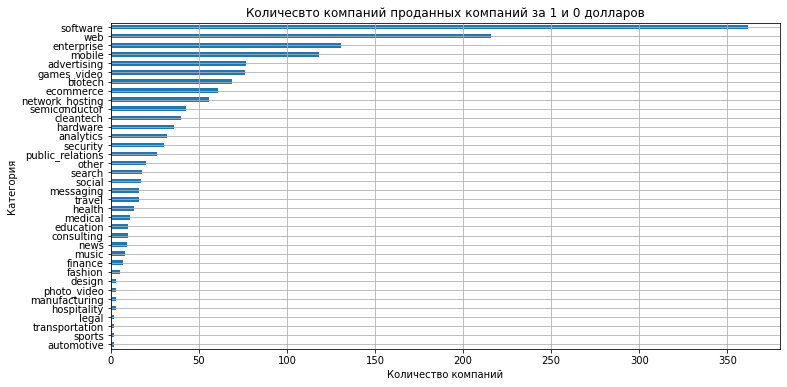

In [ ]:
plt.figure(figsize=(12,6))

df_company_acquisition_flt['category_code'].value_counts().sort_values(ascending = True).plot(kind = 'barh')

plt.title('Количесвто компаний проданных компаний за 1 и 0 долларов')
plt.ylabel('Категория')
plt.grid(True)
plt.xlabel('Количество компаний')
plt.xticks(rotation=0)
plt.show()

Посчитаем точыне значения кол-ва компаний, проданных за 0 и 1 доллар по каждой категории с помощью сводной таблицы. 

In [ ]:
pivot1 = df_company_acquisition_flt.pivot_table(values='price_amount', index='category_code', aggfunc='count').sort_values(by = 'price_amount', ascending = False)
display(pivot1)

,price_amount
category_code,
software,362
web,216
enterprise,131
mobile,118
advertising,77
games_video,76
biotech,69
ecommerce,61
network_hosting,56


In [ ]:
# Установим опцию отображения чисел в обычном формате, а не экспоненциальном
pd.set_option('display.float_format', '{:.2f}'.format)

# Изучим статистические показатели и выбросы относительно столлбца funding_total
df_company_acquisition_flt['funding_total'].describe()

count         1618.00
mean      18152961.94
std      144503027.47
min           3750.00
25%        2000000.00
50%        6000000.00
75%       15500000.00
max     5700000000.00
Name: funding_total, dtype: float64

Можно замеитить, что медиана (6 000 000) отличается от среднего арифметического поти в три раза (18 152 961). Можно также заметить достаточно высокое значение стандартного отклонения (144 503 027), что свидетельствует о сильном отклонения значений от среднего. 

Между минимальным значением (3 750) и 25 процентилем (2 000 000) видна сильная разница. Необходимо посчитать квартили между этими значениями. Посчитаем 5, 10, 15, 20 квартили. 

Можно также заметить, что между 75 процентилем (15 500 000) и макисмальным значением (5 700 000 000) видна сильная разница, значит выбросы скорее всего находятся в промежутке между ними. Найдем 80, 85, 90, 95 и 99 квартили, чтобы более подробно изучить есто расположение выбросов. 



In [ ]:
display(round(df_company_acquisition_flt['funding_total'].quantile(0.05), 2))
display(round(df_company_acquisition_flt['funding_total'].quantile(0.1), 2))
display(round(df_company_acquisition_flt['funding_total'].quantile(0.15), 2))
display(round(df_company_acquisition_flt['funding_total'].quantile(0.20), 2))


display(round(df_company_acquisition_flt['funding_total'].quantile(0.80), 2))
display(round(df_company_acquisition_flt['funding_total'].quantile(0.85), 2))
display(round(df_company_acquisition_flt['funding_total'].quantile(0.90), 2))
display(round(df_company_acquisition_flt['funding_total'].quantile(0.95), 2))
display(round(df_company_acquisition_flt['funding_total'].quantile(0.99), 2))

250000.0

513588.5

1000000.0

1400000.0

20000000.0

25353735.0

33015810.0

51487500.0

151552930.0

Промежуточные итоги:
- Минимальное значение - 3 750.
- 5 квартилю соответсвует значение - 250 000. 
- 10 квартилю соответсвует значение - 513 588. 
- 15 квартилю соответсвует значение - 1 000 000. 
- 20 квартилю соответсвует значение - 1 400 000.
- 25 квартилю соответсвует значение - 2 000 000.


- 75 квартилю соответсвует значение - 15 500 000. 
- 80 квартилю соответсвует значение - 20 000 000. 
- 85 квартилю соответсвует значение - 25 353 735. 
- 90 квартилю соответсвует значение - 33 015 810. 
- 95 квартилю соответсвует значение - 51 487 500. 
- 99 квартилю соответсвует значение - 151 552 930. 
- Максимальное значение - 5 700 000 000.

Можно заметить, что с 5 (250 000) квартиля до 25 процентиля (2 000 000) средства распредлены адекватно и равномерно, но между минимальным значением и 5 квартилем огромная разница, из чего мы можем сделать вывод, что 5 квартиль (250 000) это верхняя граница выбросов

Мы видим, что до 95 квартиля (51 487 500) наблюдается плавное увеличение значений. Между 99 квартилем (151 552 930) и максимальным значением (5 700 000 000) также наблюдается существенная разница. На всякий случай посчитаем 98 процентиль. Следовательно, выбросы, скорее всего начинаются после 99 квартиля (151 552 930) и он будет являться нижней границей выбросов. 

- Верхняя граница выбросов:  5 квартиль (250 000).
- Нижняя граница выбросов: 99 квартиль (151 552 930). 

In [ ]:
# Код ревьюера

from scipy import stats
# Вычисление первого и третьего квартилей
Q1 = df_company_acquisition_flt['funding_total'].quantile(0.25)
Q3 = df_company_acquisition_flt['funding_total'].quantile(0.75)

# Вычисление межквартильного размаха
IQR = Q3 - Q1

# Определение границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Определение процентилей для границ с использованием percentileofscore
lower_percentile = stats.percentileofscore(df_company_acquisition_flt['funding_total'], lower_bound)
upper_percentile = stats.percentileofscore(df_company_acquisition_flt['funding_total'], upper_bound)


print(f"Нижняя граница (ниже неё — выброс вниз): {lower_percentile:,.2f}")
print(f"Верхняя граница (выше неё — выброс вверх): {upper_percentile:,.2f}")

Нижняя граница (ниже неё — выброс вниз): 0.00
Верхняя граница (выше неё — выброс вверх): 90.91



### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

Объясним, почему решили составить топ именно из такого числа категорий и почему рассчитывали именно так.

Для начала найдем стартапы с типично высокими ценами. 

In [ ]:
df_company_acquisition_grouped1 = df_company_acquisition.groupby('category_code')['price_amount'].median().sort_values( ascending = False)

display(df_company_acquisition_grouped1)

category_code
nanotech           584000000.00
manufacturing       72000000.00
real_estate         50000000.00
automotive          43000000.00
biotech             13200000.00
hospitality         12500000.00
finance               600000.00
news                       0.00
nonprofit                  0.00
other                      0.00
photo_video                0.00
public_relations           0.00
advertising                0.00
search                     0.00
security                   0.00
semiconductor              0.00
social                     0.00
software                   0.00
sports                     0.00
transportation             0.00
travel                     0.00
network_hosting            0.00
messaging                  0.00
music                      0.00
fashion                    0.00
cleantech                  0.00
consulting                 0.00
design                     0.00
ecommerce                  0.00
education                  0.00
enterprise                

Далее найдем катеогрии стартапов с наибольшим разбросом цен. Посчитаем наибольший разброс цен через стандартное отклонение. 

In [ ]:
# Профедем фильтрацию, исклтв значения выше 99 квартиля

q1 = df_company_acquisition['price_amount'].quantile(0.99)

df_company_acquisition99 = df_company_acquisition[df_company_acquisition['price_amount']<q1]

df_company_acquisition_grouped1 = df_company_acquisition99.groupby('category_code')['price_amount'].std().sort_values( ascending = False)

display(df_company_acquisition_grouped1)

category_code
automotive         1193005553.21
hospitality         651449440.58
manufacturing       594791244.03
real_estate         479040882.04
finance             444101695.15
sports              426561836.08
transportation      408848557.36
cleantech           333807072.84
biotech             317894007.72
network_hosting     309789962.30
photo_video         287732057.47
enterprise          272866589.10
other               257370549.35
security            252666849.28
advertising         221534302.74
semiconductor       221452029.79
software            214929469.35
search              194157764.05
web                 185765635.19
public_relations    181839059.61
hardware            179905887.21
mobile              162341639.06
ecommerce           151236352.36
games_video         145632306.44
education           125364201.89
health              116149013.48
consulting          114080574.91
medical             105950927.12
fashion              95742908.59
music                72198580

Промежуточный вывод:

Категории стартапов с типично высокими ценами. В данный топ вошло всего 7 категорий компаний, так как далее компании имеют цену 0, что не является высокой ценой.
1. nanotech           584 000 000.00
2. manufacturing       72 000 000.00
3. real_estate         50 000 000.00
4. automotive          43 000 000.00
5. biotech             13 200 000.00
6. hospitality         12 500 000.00
7. finance               600 000.00

Наиболее дорогими стартапами являются те, которые относятся к категории nanotech (584 000 000). Наименее дорогими стартапами являются те, которые относятся к категории finance (600 000). Стартапы в категории nanotech могут быть просто достаточно перспективными в развитии, поэтому у них высокая типичная цена. Стартапы в категории finance могут быть достаточно нестабильными, поэтому на них цена низкая. 

Категории стартапов с наибольшим разбросом цен за стартап. В данный топ вошло всего 7 категорий компаний, так как только у этих компаний стандартное отклонение максимально, исчисляется в млрд долларов и варьируется от 600 до 400 млн доллларов. В топе категорий стаптапов с типично выскоими ценами также 7 категорий, удобно сравнивать такие топы. 

1. automotive         1 193 005 553.21
2. hospitality         651 449 440.58
3. manufacturing       594 791 244.03
4. real_estate         479 040 882.04
5. finance             444 101 695.15
6. sports              426 561 836.08
7. transportation      408 848 557.36

Наибольший разброс можно наблюдать в категории automotive (1 193 005 553). Наименьший разброс можно наблюдать в категории transportation (408 848 557).

В оба топа попали категориии стартапов: manufacturing, automotive, finance, hospitality, real_estate.


### 3.5. Сколько раундов продержится стартап перед покупкой

- Необходимо проанализировать столбец `funding_rounds`. Исследуем значения столбца. Заказчика интересует типичное значение количества раундов для каждого возможного статуса стартапа.
- Построим график, который отображает, сколько в среднем раундов финансирования проходило для стартапов из каждой группы. 

Посмотрим на таблицу и значение `funding_rounds` в ней, тип данных в столбце, количество пропусков и уникальные значения. 

In [ ]:
display(df_company.head())
display(df_company['funding_rounds'].dtype)
display(df_company['funding_rounds'].isna().sum())
display(df_company['funding_rounds'].unique())
display(df_company['funding_rounds'].nunique())

,company_ID,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1,wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,usa,0.00,3.00,39750000.00,5.00
3,10,flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,usa,0.00,0.00,0.00,0.00
4,100,there,games_video,acquired,NaT,NaT,there.com,NaN,usa,0.00,0.00,0.00,4.00
5,10000,mywebbo,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.00,0.00,0.00,0.00
6,10001,the movie streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.00,0.00,0.00,0.00


dtype('float64')

0

array([ 3.,  0.,  1.,  5.,  2.,  7.,  4.,  6.,  8., 10.,  9., 13., 11.,
       15., 14., 12.])

16

Пропусков обнаружено не было, столбец имеет числовой с плавающей точкой тип данных. Уникальных значений не так много, всего 16, минимальное кол-во раундов равно 0, максимальное - 15. 

Построим столбачтый график с типичным количеством раундов по статусам. 

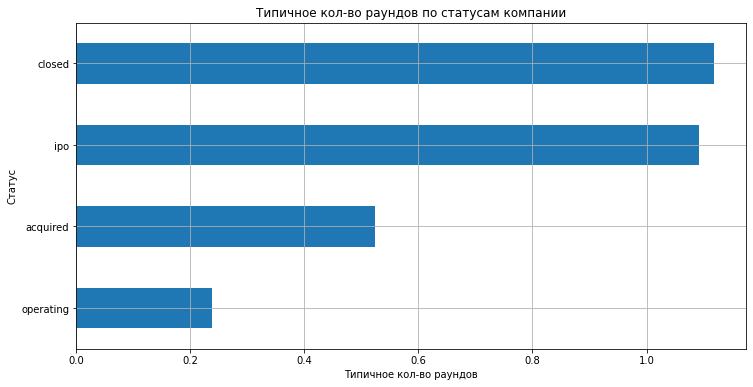

In [ ]:
plt.figure(figsize=(12,6))

df_company.groupby('status')['funding_rounds'].mean().sort_values(ascending = True).plot(kind = 'barh')

plt.title('Типичное кол-во раундов по статусам компании')
plt.ylabel('Статус')
plt.grid(True)
plt.xlabel('Типичное кол-во раундов')
plt.xticks(rotation=0)
plt.show()

In [ ]:
pivot3 = df_company.pivot_table(values = 'funding_rounds', index = 'status', aggfunc = 'mean').sort_values(by = 'funding_rounds',ascending = False)
display(pivot3)

,funding_rounds
status,
closed,1.12
ipo,1.09
acquired,0.52
operating,0.24


Промежуточные выводы: 

- Уникальных значений не так много, всего 16, минимальное кол-во раундов равно 0, максимальное - 15. 
- Макисмальное значение типичного числа раундов у стартапов со статусом closed - 1.12. 
- Минимальное значение типичного числа раундов у стартапов со статусом operating - 0.24. 


## Шаг 4. Итоговый вывод и рекомендации

Итоговые выводы:


2.1

- Больше всего раундов было в 2012 году (24549.0). Меньше всего -  в 1998 (72.0). 

В каком году типичный размер собранных в рамках одного раунда средств был максимален?

- В 2005 году типичный замер собранных средств в рамках одного раунда был максимален (5500000.0). 

Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

- Анализируя график, можно выделить его пик в 2005 году,после которого график пошел на спад, но с 2012 по 2013 год он начал рости и точка графика 2013 года выше точки графика 2012 года. По сравнению с 2012 годом в 2013 количество раундов уменьшилось,  а количество выделяемых средств увеличилиось. 



2.2
- Мы посчитали долю сотрудников без образования в каждой категории. Вот каие результаты мы получили:
1. Микропредприятие	0.48
2. Малые предприятие 0.33
3. Крупные предприятия 0.31
4. Средние предприятия	0.25

- Наибольшая доля сотрудников без образования в категории "Микропредприятия" (до 15 сотрудников). Можно предположить, что такие предприятия только начали развиваться и набирают в штат стажеров-студентов, которые пока находятся в процессе получения образования. Или, например, в таких компаниях ценят больше опыт работы, чем факт наличия образования. Самая низкая доля работников без образования в категории "Средние предприятия". Это может быть связано с тем, что такие предприятия хотят масштабно развиваться и расти и переходить в разряд Крпуных предприятий и им требуются обученные управленцы и специалисты, поэтому такие компании больше смотрят в сторону работников с образованием. 

- Присоединить таблицу `degrees.csv` возможно, так как еще в перовм пункте мы привели [индексы к единому виду](#dgr). 

2.3

- В целом, объединить две таблицы `company_and_rounds по столбцу` и `people` по столбцу `network_username`: столбцы имеют один тип данных. Но так или иначе в итоговой объединенной таблице будут пропуски, так как в одной таблице строк в целом больше и, соответвеннно, больше `network_username`. Также велика вероятность, что возможно некоторые `network_username` не будут находить совпадений в другой таблице, но тем не менее само объединение возможно. 

2.4

- Провели преобразование таблиц, избавились от дубликатов и пропусков, тем самам упростили дальнейший анализ.Мы получили две новых таблицы df_company и df_rounds. В первой таблице 217774 строк и 13 столбцов. Во второй таблице 217774 строк и 10 столбцов. Можно предположить, что для таблиицы `rounds` `company_id` - внешний ключ, так как он повторяется. 

3.2

- Типичный объем общего финансирования компании без учета 0 значений составил 2 564 500. 

3.3


3.4

- Наиболее дорогими стартапами являются те, которые относятся к категории nanotech (584 000 000). Наименее дорогими стартапами являются те, которые относятся к категории finance (600 000). Стартапы в категории nanotech могут быть просто достаточно перспективными в развитии, поэтому у них высокая типичная цена. Стартапы в категории finance могут быть достаточно нестабильными, поэтому на них цена низкая. 

- Наибольший разброс можно наблюдать в категории automotive (1 193 005 553). Наименьший разброс можно наблюдать в категории transportation (408 848 557).

- В оба топа попали категориии стартапов: manufacturing, automotive, finance, hospitality, real_estate.

3.5

- Уникальных значений кол-ва раундов не так много, всего 16, минимальное кол-во раундов равно 0, максимальное - 15. 
- Макисмальное значение типичного числа раундов у стартапов со статусом closed - 1.12. 
- Минимальное значение типичного числа раундов у стартапов со статусом operating - 0.24.

Рекомендации:

Заказчики могут выбирать стартапы с ценами ниже, чем у стартапов категории nanotech, которые являются наиболее дорогими, чтобы сэкономить средства, а вложиться можно  в чуть более дешевые категории и развить их, например real_estate (50 000 000) или (automotive 43 000 000). Также заказчиками не стоит выбирать стартапы категории с наибольшим разбросом цен enterprise, так как есть шансы переплатить. 